<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1)-데이터프레임-기초와-필터링" data-toc-modified-id="1)-데이터프레임-기초와-필터링-1">1) 데이터프레임 기초와 필터링</a></span></li><li><span><a href="#2)-요약" data-toc-modified-id="2)-요약-2">2) 요약</a></span></li><li><span><a href="#3)-파생변수-생성" data-toc-modified-id="3)-파생변수-생성-3">3) 파생변수 생성</a></span></li><li><span><a href="#4)-텍스트-데이터-처리" data-toc-modified-id="4)-텍스트-데이터-처리-4">4) 텍스트 데이터 처리</a></span></li><li><span><a href="#6)-Pivoting" data-toc-modified-id="6)-Pivoting-5">6) Pivoting</a></span></li><li><span><a href="#7)-데이터-병합" data-toc-modified-id="7)-데이터-병합-6">7) 데이터 병합</a></span></li><li><span><a href="#8)-기타" data-toc-modified-id="8)-기타-7">8) 기타</a></span></li></ul></div>

Q. 데이터프레임을 다루는 패키지를 불러오자

In [81]:
## Data Frame은 Pandas를 통해 불러올 수 있다.
import pandas as pd

In [82]:
pd.__version__

'0.25.1'

# 1) 데이터프레임 기초와 필터링

- DataFrame 색인 `.colname vs ['colname']`

In [83]:
## dict_data는 a,  shape라는 column을 가진 Data 이다.
dict_data=dict(a=[1,2,3,4], shape=[7,34,1,9])

In [84]:
df=pd.DataFrame(dict_data)
df

,a,shape
0,1,7
1,2,34
2,3,1
3,4,9


In [85]:
df.a

0    1
1    2
2    3
3    4
Name: a, dtype: int64

In [86]:
df['a']

0    1
1    2
2    3
3    4
Name: a, dtype: int64

In [87]:
df['shape']

0     7
1    34
2     1
3     9
Name: shape, dtype: int64

In [88]:
## .shape는 column이 아니라, data_frame의 method이다. => 명확한 column을 불러오기위해서는 [colname]사용하여 적용하기
df.shape

(4, 2)

In [89]:
dir(df)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 

- DataFrame의 변수명 확인 및 변경

In [90]:
df.columns

Index(['a', 'shape'], dtype='object')

In [91]:
df.columns.values[0] = 'b'

In [92]:
df.columns

Index(['b', 'shape'], dtype='object')

In [93]:
df.head()

,b,shape
0,1,7
1,2,34
2,3,1
3,4,9


In [94]:
df.columns = ['c', 'shape']

In [95]:
df

,c,shape
0,1,7
1,2,34
2,3,1
3,4,9


In [96]:
df = df.rename(columns={'shape' : 'd'})

In [97]:
df

,c,d
0,1,7
1,2,34
2,3,1
3,4,9


- Pandas 객체 필터링  `loc vs. iloc`  
    - file: `krx_202105_utf8.csv`
    - Purely integer-location based indexing for selection by position. `iloc`

In [98]:
df.loc[1:]

,c,d
1,2,34
2,3,1
3,4,9


In [99]:
df.iloc[1:]

,c,d
1,2,34
2,3,1
3,4,9


In [100]:
df.index = [11,12,13,14]

In [101]:
df

,c,d
11,1,7
12,2,34
13,3,1
14,4,9


In [102]:
df.loc[11:]

,c,d
11,1,7
12,2,34
13,3,1
14,4,9


In [103]:
df.iloc[11:]

,c,d


In [104]:
df.iloc[1:]

,c,d
12,2,34
13,3,1
14,4,9


In [105]:
df.index = [12, 11,13,14]
df

,c,d
12,1,7
11,2,34
13,3,1
14,4,9


In [106]:
df.loc[11:]

,c,d
11,2,34
13,3,1
14,4,9


In [107]:
#df.loc[0] ## KeyError: 0없는 index 사용됨

In [108]:
#df.iloc[0] 첫번째 원소

In [109]:
df.index = [11,12,13,14]
df
df.loc[0:]

,c,d
11,1,7
12,2,34
13,3,1
14,4,9


- 인덱스가 꼬여 있는 경우

In [110]:
df.index = [-3, -1, -2, -4]
df

,c,d
-3,1,7
-1,2,34
-2,3,1
-4,4,9


In [111]:
df.loc[:-1]

,c,d
-3,1,7
-1,2,34


In [112]:
df.iloc[1:]

,c,d
-1,2,34
-2,3,1
-4,4,9


In [124]:
## -1의 사용에 따라 의미 가 다름 
## iloc 슬라이싱[:-1] 할 때는 -1행부터 앞 행까지 뜻함, 인덱싱[-1]

In [114]:
df.columns

Index(['c', 'd'], dtype='object')

In [115]:
df

,c,d
-3,1,7
-1,2,34
-2,3,1
-4,4,9


In [118]:
## drop=True 사용시 기존의 index를 column으로 빼지 않고 없앤다.
df = df.reset_index(drop=True)

In [119]:
df

,c,d
0,1,7
1,2,34
2,3,1
3,4,9


---

Q. `krx_202105_utf8.csv` 을 불러오자

In [125]:
df_krx = pd.read_csv('../Datasets/krx_202105_utf8.csv')
df_krx.head()

,지수명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,날짜
0,KRX 300,1901.05,-11.63,-0.61,1913.15,1929.94,1896.65,279548840,13488481375036,2028800954161500,20210503
1,KTOP 30,11520.28,-86.30,-0.74,11609.44,11702.14,11490.84,50048566,5645660149606,1208343758559140,20210503
2,KRX 100,6624.66,-29.51,-0.44,6656.43,6722.06,6607.57,125958178,9134221260606,1698357633429640,20210503
3,KRX Mid 200,1807.31,-38.30,-2.08,1844.35,1855.67,1805.75,192901461,2205453931448,97954895348159,20210503
4,KRX 자동차,2264.05,46.91,2.12,2218.81,2316.00,2218.81,12130931,907051604153,132659985792225,20210503


Q. 단순회귀(독립 `시가`, 종속 `종가` ) 문제에서 독립변수를 함수에 넣을 때 올바른 방법은?
`df_krx['시가'] vs. df_krx[['시가']]`

In [128]:
df_krx['시가'] ## Series 형태

0       1913.15
1      11609.44
2       6656.43
3       1844.35
4       2218.81
         ...   
546      757.90
547     3715.73
548     2633.74
549     1860.91
550     1852.65
Name: 시가, Length: 551, dtype: float64

In [129]:
df_krx['시가'].shape

(551,)

In [130]:
df_krx[['시가']] ## data frame 형태

,시가
0,1913.15
1,11609.44
2,6656.43
3,1844.35
4,2218.81
...,...
546,757.90
547,3715.73
548,2633.74
549,1860.91


In [131]:
df_krx[['시가']].shape

(551, 1)

Q. `지수명` 변수의 원소가 `KRX 300`이거나 `KRX 반도체`인 행을 추출하여 df_krx300_krxban 객체에 저장하시오.

In [160]:
df_krx300_krx300 = df_krx.loc[df_krx['지수명'] == 'KRX 300',]
df_krx300_krx300

df_krx300_krxsilica = df_krx.loc[df_krx['지수명'] == 'KRX 반도체',]
df_krx300_krxsilica

df_krx300_krxban = pd.concat([df_krx300_krx300, df_krx300_krxsilica]).sort_index()
df_krx300_krxban.head()

,지수명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,날짜
0,KRX 300,1901.05,-11.63,-0.61,1913.15,1929.94,1896.65,279548840,13488481375036,2028800954161500,20210503
5,KRX 반도체,3852.24,-20.18,-0.52,3872.85,3940.15,3836.17,19861668,952405532133,131186340258830,20210503
29,KRX 300,1916.40,15.35,0.81,1903.57,1916.40,1892.36,244040965,11708937073166,2043945386926060,20210504
34,KRX 반도체,3870.59,18.35,0.48,3849.45,3875.19,3774.04,20327698,792228260746,131691071180590,20210504
58,KRX 300,1927.40,11.00,0.57,1916.50,1927.40,1904.76,341534594,13004811637843,2059578026871265,20210506


In [156]:
df_krx300_krxban.shape

(38, 11)

In [162]:
df_krx300_krxban = df_krx.loc[df_krx['지수명'].isin(['KRX 300','KRX 반도체']),]
df_krx300_krxban

df_krx.loc[(df_krx['지수명'] == 'KRX 300') | (df_krx['지수명'] == 'KRX 반도체')]

,지수명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,날짜
0,KRX 300,1901.05,-11.63,-0.61,1913.15,1929.94,1896.65,279548840,13488481375036,2028800954161500,20210503
5,KRX 반도체,3852.24,-20.18,-0.52,3872.85,3940.15,3836.17,19861668,952405532133,131186340258830,20210503
29,KRX 300,1916.40,15.35,0.81,1903.57,1916.40,1892.36,244040965,11708937073166,2043945386926060,20210504
34,KRX 반도체,3870.59,18.35,0.48,3849.45,3875.19,3774.04,20327698,792228260746,131691071180590,20210504
58,KRX 300,1927.40,11.00,0.57,1916.50,1927.40,1904.76,341534594,13004811637843,2059578026871265,20210506
63,KRX 반도체,3832.74,-37.85,-0.98,3869.15,3869.15,3802.16,19682896,961851244459,129283201609030,20210506
87,KRX 300,1936.40,9.00,0.47,1926.59,1942.80,1925.24,253210064,11101387594368,2070880919861705,20210507
92,KRX 반도체,3841.40,8.66,0.23,3839.24,3856.26,3818.38,15080811,779775997028,129722987007120,20210507
116,KRX 300,1968.47,32.07,1.66,1938.63,1973.17,1938.63,294421965,13784089230905,2105851479694870,20210510
121,KRX 반도체,3878.08,36.68,0.95,3844.16,3882.88,3829.59,18526677,837790103870,130453172770120,20210510


Q. df_krx300_krxban 객체에서 `거래대금`이 가장 큰 `지수명`은?

In [164]:
df_krx300_krxban['거래대금'].max()

17156385452981

In [165]:
df_krx300_krxban.loc[df_krx300_krxban['거래대금'] == df_krx300_krxban['거래대금'].max(), '지수명']

464    KRX 300
Name: 지수명, dtype: object

In [170]:
df_krx300_krxban.loc[df_krx300_krxban.loc[:, '거래대금'].idxmax()]

지수명                KRX 300
종가                 1910.09
대비                   -1.59
등락률                  -0.08
시가                 1913.55
고가                 1915.55
저가                 1894.84
거래량              327607567
거래대금        17156385452981
상장시가총액    2043966667110420
날짜                20210527
Name: 464, dtype: object

In [172]:
df_test = df_krx300_krxban.reset_index()
df_test.iloc[df_test.loc[:, '거래대금'].idxmax()]

index                  464
지수명                KRX 300
종가                 1910.09
대비                   -1.59
등락률                  -0.08
시가                 1913.55
고가                 1915.55
저가                 1894.84
거래량              327607567
거래대금        17156385452981
상장시가총액    2043966667110420
날짜                20210527
Name: 32, dtype: object

- 데이터 정렬 `sort_values`

Q. df_krx에서 20210527 에 거래된 지수 중 거래대금이 큰 순으로 5개 추출하면?

In [184]:
df_sort = df_krx.loc[df_krx['날짜'] == 20210527].sort_values(by = "거래대금", ascending=False)
df_sort[:5]

,지수명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,날짜
464,KRX 300,1910.09,-1.59,-0.08,1913.55,1915.55,1894.84,327607567,17156385452981,2043966667110420,20210527
466,KRX 100,6631.32,-9.37,-0.14,6646.38,6653.30,6574.30,146420657,12129156337634,1697216654394830,20210527
465,KTOP 30,11450.08,-41.91,-0.36,11486.14,11497.12,11339.63,65398765,7845326920724,1193021507292880,20210527
483,KRX 정보기술,1732.05,9.16,0.53,1727.73,1736.84,1704.28,50025879,3306883824066,700064121819690,20210527
485,KRX 300 정보기술,2805.77,15.35,0.55,2798.53,2813.72,2760.15,44179081,3225022154176,696336543173370,20210527


- 결측치 처리 `isna` `fillna`  
    - file: `iris_missing.csv` 

Q. `iris_missing.csv` 을 불러오자 (20초)

In [209]:
df_iris = pd.read_csv("../Datasets/iris_missing.csv")
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,NaN,NaN,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,NaN,2.5,NaN,NaN,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [210]:
df_iris_dropna = df_iris.dropna()
df_iris_dropna

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
147,6.5,3.0,5.2,2.0,virginica


In [211]:
df_iris_fillna = df_iris.fillna(method="bfill")
df_iris_fillna

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.0,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.5,2.5,5.2,2.0,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Q. setosa기준으로 Sepal.Width 평균으로 Sepal.Width na값을 대체한 후 df_iris에 반영하라 (5분)
1. setosa그룹의 Sepal.Width 평균
2. Sepal.Width na값 대체

In [214]:
mean_setosa_sepal_width = df_iris.loc[df_iris['Species'] == 'setosa', 'Sepal.Width'].mean()
mean_setosa_sepal_width

3.4444444444444446

In [215]:
df_iris.loc[df_iris['Species'] == 'setosa', 'Sepal.Width']

0     NaN
1     3.0
2     3.2
3     3.1
4     3.6
5     3.9
6     NaN
7     3.4
8     2.9
9     3.1
10    3.7
11    3.4
12    NaN
13    3.0
14    4.0
15    4.4
16    3.9
17    3.5
18    3.8
19    3.8
20    3.4
21    3.7
22    3.6
23    3.3
24    3.4
25    3.0
26    3.4
27    3.5
28    3.4
29    3.2
30    3.1
31    3.4
32    4.1
33    4.2
34    NaN
35    3.2
36    3.5
37    3.6
38    3.0
39    NaN
40    3.5
41    2.3
42    3.2
43    3.5
44    3.8
45    3.0
46    3.8
47    3.2
48    3.7
49    3.3
Name: Sepal.Width, dtype: float64

In [206]:
df_iris.loc[df_iris['Species'] == 'setosa', 'Sepal.Width'].fillna(mean_setosa_sepal_width)

0     3.444444
1     3.000000
2     3.200000
3     3.100000
4     3.600000
5     3.900000
6     3.444444
7     3.400000
8     2.900000
9     3.100000
10    3.700000
11    3.400000
12    3.444444
13    3.000000
14    4.000000
15    4.400000
16    3.900000
17    3.500000
18    3.800000
19    3.800000
20    3.400000
21    3.700000
22    3.600000
23    3.300000
24    3.400000
25    3.000000
26    3.400000
27    3.500000
28    3.400000
29    3.200000
30    3.100000
31    3.400000
32    4.100000
33    4.200000
34    3.444444
35    3.200000
36    3.500000
37    3.600000
38    3.000000
39    3.444444
40    3.500000
41    2.300000
42    3.200000
43    3.500000
44    3.800000
45    3.000000
46    3.800000
47    3.200000
48    3.700000
49    3.300000
Name: Sepal.Width, dtype: float64

In [216]:
df_iris.loc[df_iris['Species'] == 'setosa', 'Sepal.Width'] = \
df_iris.loc[df_iris['Species'] == 'setosa', 'Sepal.Width'].fillna(mean_setosa_sepal_width)

In [217]:
df_iris.loc[df_iris['Species'] == 'setosa', 'Sepal.Width']

0     3.444444
1     3.000000
2     3.200000
3     3.100000
4     3.600000
5     3.900000
6     3.444444
7     3.400000
8     2.900000
9     3.100000
10    3.700000
11    3.400000
12    3.444444
13    3.000000
14    4.000000
15    4.400000
16    3.900000
17    3.500000
18    3.800000
19    3.800000
20    3.400000
21    3.700000
22    3.600000
23    3.300000
24    3.400000
25    3.000000
26    3.400000
27    3.500000
28    3.400000
29    3.200000
30    3.100000
31    3.400000
32    4.100000
33    4.200000
34    3.444444
35    3.200000
36    3.500000
37    3.600000
38    3.000000
39    3.444444
40    3.500000
41    2.300000
42    3.200000
43    3.500000
44    3.800000
45    3.000000
46    3.800000
47    3.200000
48    3.700000
49    3.300000
Name: Sepal.Width, dtype: float64

In [218]:
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.444444,NaN,0.2,setosa
1,4.9,3.000000,1.4,0.2,setosa
2,4.7,3.200000,1.3,0.2,setosa
3,4.6,3.100000,1.5,0.2,setosa
4,5.0,3.600000,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.000000,5.2,2.3,virginica
146,NaN,2.500000,NaN,NaN,virginica
147,6.5,3.000000,5.2,2.0,virginica
148,6.2,3.400000,5.4,2.3,virginica


In [ ]:
df_iris[df_iris['Species'] == 'setosa'].fillna(value={"Sepal.Width":mean_setosa_sepal_width})

Q. isna를 사용하여 위의 결과를 그대로 반영하는 코드를 작성하시오

In [224]:
df_iris = pd.read_csv("../Datasets/iris_missing.csv")
mean_setosa_sepal_width = df_iris.loc[df_iris['Species'] == 'setosa', 'Sepal.Width'].mean()
df_iris.loc[(df_iris['Species'] == 'setosa') & (df_iris['Sepal.Width'].isna()), 'Sepal.Width'] = mean_setosa_sepal_width
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.444444,NaN,0.2,setosa
1,4.9,3.000000,1.4,0.2,setosa
2,4.7,3.200000,1.3,0.2,setosa
3,4.6,3.100000,1.5,0.2,setosa
4,5.0,3.600000,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.000000,5.2,2.3,virginica
146,NaN,2.500000,NaN,NaN,virginica
147,6.5,3.000000,5.2,2.0,virginica
148,6.2,3.400000,5.4,2.3,virginica


# 2) 요약 
- file:`bike_sharing.csv`, `diamonds.csv`

- 원소 개수 확인 `unique` `value_counts` `crosstab`

In [225]:
df_bike = pd.read_csv('../Datasets/bike_sharing.csv')
df_bike[:5]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [227]:
df_bike['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [228]:
df_bike['season'].nunique()

4

In [229]:
df_bike['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [231]:
df_bike['season'].value_counts(normalize=True).round(2)

4    0.25
3    0.25
2    0.25
1    0.25
Name: season, dtype: float64

Q. weather 와 season의 동시출현수를 한 번에 표현하라

In [234]:
pd.crosstab(df_bike['weather'], df_bike['season'])

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [235]:
pd.crosstab(df_bike['weather'], df_bike['season'], margins=True)

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


In [239]:
pd.crosstab(df_bike['weather'], df_bike['season'], margins=True, normalize=True).round(2)

season,1,2,3,4,All
weather,,,,,
1,0.16,0.17,0.18,0.16,0.66
2,0.07,0.07,0.06,0.07,0.26
3,0.02,0.02,0.02,0.02,0.08
4,0.00,0.00,0.00,0.00,0.00
All,0.25,0.25,0.25,0.25,1.00


- weather 별로 season의 비율 구하기

In [240]:
pd.crosstab(df_bike['weather'], df_bike['season'], margins=True, normalize='index').round(2)
# 행방향

season,1,2,3,4
weather,,,,
1,0.24,0.25,0.27,0.24
2,0.25,0.25,0.21,0.28
3,0.25,0.26,0.23,0.26
4,1.00,0.00,0.00,0.00
All,0.25,0.25,0.25,0.25


- season별로 weather의 비율 구하기

In [241]:
pd.crosstab(df_bike['weather'], df_bike['season'], margins=True, normalize='columns').round(2)
# 열방향

season,1,2,3,4,All
weather,,,,,
1,0.65,0.66,0.71,0.62,0.66
2,0.27,0.26,0.22,0.30,0.26
3,0.08,0.08,0.07,0.08,0.08
4,0.00,0.00,0.00,0.00,0.00


 - 그룹화 `groupby`

Q. diamonds 데이터를 가져와서 cut을 기준으로 그룹화를 한 후 가격(price)에 대한 'min','median'를 구한 후 median기준으로 오름차순이 되게 하세요

In [242]:
df_diamond = pd.read_csv('../Datasets/diamonds.csv')
df_diamond.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [254]:
df_diamond.groupby("cut")["price"].agg(["mean", 'median']).sort_values('median')

,mean,median
cut,,
Ideal,3457.541970,1810.0
Very Good,3981.759891,2648.0
Good,3928.864452,3050.5
Premium,4584.257704,3185.0
Fair,4358.757764,3282.0


In [255]:
df_diamond.groupby("cut")['price'].min()

cut
Fair         337
Good         327
Ideal        326
Premium      326
Very Good    336
Name: price, dtype: int64

- agg vs. mean

In [257]:
df_diamond.groupby("cut")['price'].agg(['min'])

,min
cut,
Fair,337
Good,327
Ideal,326
Premium,326
Very Good,336


In [258]:
df_diamond.groupby("cut")['price'].agg(['min']).shape

(5, 1)

In [259]:
df_diamond.groupby("cut")['price'].agg('min')

cut
Fair         337
Good         327
Ideal        326
Premium      326
Very Good    336
Name: price, dtype: int64

In [260]:
df_diamond.groupby("cut")['price'].agg('min').shape

(5,)

In [261]:
df_diamond.groupby("cut")['price'].min()

cut
Fair         337
Good         327
Ideal        326
Premium      326
Very Good    336
Name: price, dtype: int64

In [262]:
df_diamond.groupby("cut")['price'].min().shape

(5,)

# 3) 파생변수 생성
- file:`bike_sharing.csv`

In [263]:
df_bike.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


Q. 월별로 자전거 대여횟수의 트렌드를 나타낼 수 있게 전처리를 하여라  
+(option) 가능하다면 그래프로 시각화 하여라
- casual: 미등록회원 대여횟수
- registered: 등록회원 대여횟수

ex)
```
month
1      79884
2      99113
```

In [275]:
df_bike['total'] = df_bike['casual'] + df_bike['registered']
df_bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,total
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,129


In [277]:
df_bike["datetime"]=pd.to_datetime(df_bike['datetime'])
df_bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,total
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,129


In [278]:
df_bike["datetime"].dt.month

0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: datetime, Length: 10886, dtype: int64

In [279]:
df_bike['month'] = df_bike["datetime"].dt.month

In [280]:
df_bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,total,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,13,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,336,12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,241,12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,168,12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,129,12


In [285]:
df_bike_month = df_bike.groupby('month')['total'].sum()
df_bike_month

month
1      79884
2      99113
3     133501
4     167402
5     200147
6     220733
7     214617
8     213516
9     212529
10    207434
11    176440
12    160160
Name: total, dtype: int64

<AxesSubplot:xlabel='month'>

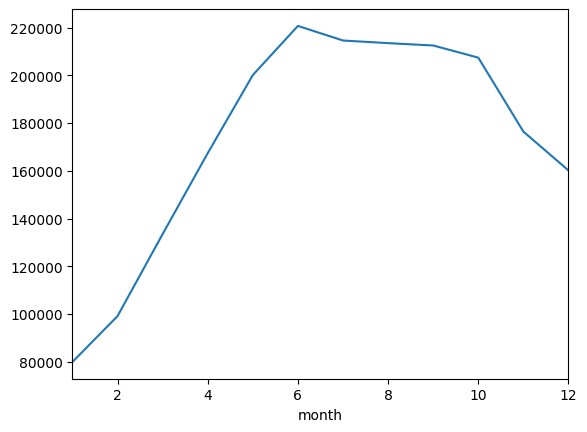

In [286]:
df_bike_month.plot()

# 4) 텍스트 데이터 처리

- 정규표현식 맛보기 regular expression

In [290]:
text = '마동석씨의 핸드폰 번호는 010-1234-5678 입니다 홍길동씨의 핸드폰 번호는 010-4567-5678 입니다 마동석씨의 핸드폰 번호는 010-1234-5678 입니다'

In [291]:
import re

In [294]:
pattern = re.compile("01[0-9]{1}-[0-9]{4}-[0-9]{4}")

In [295]:
pattern.findall(text)

['010-1234-5678', '010-4567-5678', '010-1234-5678']

In [296]:
df_krx.head()

,지수명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,날짜
0,KRX 300,1901.05,-11.63,-0.61,1913.15,1929.94,1896.65,279548840,13488481375036,2028800954161500,20210503
1,KTOP 30,11520.28,-86.30,-0.74,11609.44,11702.14,11490.84,50048566,5645660149606,1208343758559140,20210503
2,KRX 100,6624.66,-29.51,-0.44,6656.43,6722.06,6607.57,125958178,9134221260606,1698357633429640,20210503
3,KRX Mid 200,1807.31,-38.30,-2.08,1844.35,1855.67,1805.75,192901461,2205453931448,97954895348159,20210503
4,KRX 자동차,2264.05,46.91,2.12,2218.81,2316.00,2218.81,12130931,907051604153,132659985792225,20210503


- 지수명이 `KRX 300` 을 포함하는 데이터만 가져오기

In [297]:
df_krx.loc[df_krx.지수명.str.contains('KRX 300'),'지수명'].unique()

array(['KRX 300', 'KRX 300 정보기술', 'KRX 300 금융', 'KRX 300 자유소비재',
       'KRX 300 산업재', 'KRX 300 헬스케어', 'KRX 300 커뮤니케이션서비스', 'KRX 300 소재',
       'KRX 300 필수소비재'], dtype=object)

Q. 지수명이 `KRX 숫자(3자리)` 을 포함하는 데이터만 가져올 때 위에서 배운 법칙(숫자 골라내기)을 사용하라

In [299]:
df_krx.loc[df_krx['지수명'].str.contains('KRX [0-9]{3}'), '지수명'].unique()

array(['KRX 300', 'KRX 100', 'KRX 300 정보기술', 'KRX 300 금융',
       'KRX 300 자유소비재', 'KRX 300 산업재', 'KRX 300 헬스케어',
       'KRX 300 커뮤니케이션서비스', 'KRX 300 소재', 'KRX 300 필수소비재'], dtype=object)

- 지수명이 `KRX 300`, `KRX 자동차` 을 포함하는 데이터만 가져오기

In [300]:
df_krx.loc[(df_krx['지수명'].str.contains('KRX 300')) | (df_krx['지수명'].str.contains('KRX 자동차')), '지수명'].unique()

array(['KRX 300', 'KRX 자동차', 'KRX 300 정보기술', 'KRX 300 금융',
       'KRX 300 자유소비재', 'KRX 300 산업재', 'KRX 300 헬스케어',
       'KRX 300 커뮤니케이션서비스', 'KRX 300 소재', 'KRX 300 필수소비재'], dtype=object)

In [305]:
df_krx.loc[(df_krx['지수명'].str.contains('KRX 300|KRX 자동차')), '지수명'].unique()

array(['KRX 300', 'KRX 자동차', 'KRX 300 정보기술', 'KRX 300 금융',
       'KRX 300 자유소비재', 'KRX 300 산업재', 'KRX 300 헬스케어',
       'KRX 300 커뮤니케이션서비스', 'KRX 300 소재', 'KRX 300 필수소비재'], dtype=object)

Q. diamond데이터에서 cut이 `Good` 을 포함하는 행만 가져오라

In [301]:
df_diamond.loc[df_diamond['cut'].str.contains("Good"),]

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
...,...,...,...,...,...,...,...,...,...,...
53927,0.79,Good,F,SI1,58.1,59.0,2756,6.06,6.13,3.54
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61


In [308]:
'\
isin은 동등 비교를 한다; 'Good' == 'Good', 'Good' != 'Very Good'\
Contains는 내부 글자들의 비교를 한다. 'Good'이란 글자가 없는지 그래서 Good으로 했을 때 verst Good이 출력된다.\
'

SyntaxError: invalid syntax (429146918.py, line 2)

In [316]:
df_diamond.loc[df_diamond['cut'].str.contains("^Good$"),]

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
17,0.30,Good,J,SI1,63.4,54.0,351,4.23,4.29,2.70
18,0.30,Good,J,SI1,63.8,56.0,351,4.23,4.26,2.71
...,...,...,...,...,...,...,...,...,...,...
53913,0.80,Good,G,VS2,64.2,58.0,2753,5.84,5.81,3.74
53914,0.84,Good,I,VS1,63.7,59.0,2753,5.94,5.90,3.77
53916,0.74,Good,D,SI1,63.1,59.0,2753,5.71,5.74,3.61
53927,0.79,Good,F,SI1,58.1,59.0,2756,6.06,6.13,3.54


In [320]:
df_diamond.loc[df_diamond['cut'].isin(['Good', 'Very Good']),]

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
...,...,...,...,...,...,...,...,...,...,...
53927,0.79,Good,F,SI1,58.1,59.0,2756,6.06,6.13,3.54
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61


# 6) Pivoting

- melt  
file: `weather.csv`
> 컬럼을 녹여서 행으로 보낸다

In [321]:
df_weather = pd.read_csv('../Datasets/weather.csv')
df_weather.head()

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45
3,Thursday,22,82,38
4,Friday,30,83,30


Q. berlin, chicago 의 일별 날씨 트렌드를 나타내는 데이터 차트로 표현하고 싶다. (melt 이용)

In [325]:
df_weather.melt(id_vars='day', value_name='temp')

,day,variable,temp
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


# 7) 데이터 병합

- `concat`

- vertical로 붙이기

In [326]:
df1, df2=df_weather[:3], df_weather[3:]

In [327]:
df1

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45


In [328]:
df2

,day,chicago,chennai,berlin
3,Thursday,22,82,38
4,Friday,30,83,30
5,Saturday,20,81,45
6,Sunday,25,77,47


In [336]:
pd.concat([df1, df2], )

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45
3,Thursday,22,82,38
4,Friday,30,83,30
5,Saturday,20,81,45
6,Sunday,25,77,47


- horizontal로 붙이기

In [337]:
df3, df4=df_weather[['day','chicago']], df_weather[['chennai','berlin']]

In [338]:
df3

,day,chicago
0,Monday,32
1,Tuesday,30
2,Wednesday,28
3,Thursday,22
4,Friday,30
5,Saturday,20
6,Sunday,25


In [339]:
df4

,chennai,berlin
0,75,41
1,77,43
2,75,45
3,82,38
4,83,30
5,81,45
6,77,47


In [340]:
pd.concat([df3, df4], axis=1)

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45
3,Thursday,22,82,38
4,Friday,30,83,30
5,Saturday,20,81,45
6,Sunday,25,77,47


- merge
`vlookup`
- 테이블이 분리되어 있는 경우
    - ex) 보안수준

In [341]:
d1 = {'Name': ['장준규', '홍길동', '운영자'], 'ID': ['A1', 'B1', 'A3'], 'Country': ['India', 'India', 'USA'],
      'Role': ['CEO', 'CSO', 'CTO']}
df1 = pd.DataFrame(d1)
df1

,Name,ID,Country,Role
0,장준규,A1,India,CEO
1,홍길동,B1,India,CSO
2,운영자,A3,USA,CTO


In [342]:
df2 = pd.DataFrame({'ID': ['A1', 'A2', 'A3', 'B1'], 'Security_Level': ['VIP1', 'VIP2', 'VIP3','VIP4']})
df2 

,ID,Security_Level
0,A1,VIP1
1,A2,VIP2
2,A3,VIP3
3,B1,VIP4


Q. ID기준으로 두 df를 merge하라 (2분)

In [346]:
pd.merge(left = df1, right = df2, how = "left", on="ID")

,Name,ID,Country,Role,Security_Level
0,장준규,A1,India,CEO,VIP1
1,홍길동,B1,India,CSO,VIP4
2,운영자,A3,USA,CTO,VIP3


Q. df1의 인덱스는 df2의 ID를 뜻한다. 이를 기준으로 두 df를 merge 한 후 df_merge로 할당하라 

In [347]:
d1 = {'Name': ['장준규', '홍길동', '운영자'], 'Country': ['India', 'India', 'USA'],
      'Role': ['CEO', 'CSO', 'CTO']}
df1 = pd.DataFrame(d1, index=['A1', 'B1', 'A3'])
df1
# df1.index = df1.pop('ID')
# df1.index.name = None

,Name,Country,Role
A1,장준규,India,CEO
B1,홍길동,India,CSO
A3,운영자,USA,CTO


In [348]:
df2

,ID,Security_Level
0,A1,VIP1
1,A2,VIP2
2,A3,VIP3
3,B1,VIP4


In [354]:
df_merge = pd.merge(left = df1, right = df2, how = "left", left_index = True, right_on="ID" )
df_merge

,Name,Country,Role,ID,Security_Level
0,장준규,India,CEO,A1,VIP1
3,홍길동,India,CSO,B1,VIP4
2,운영자,USA,CTO,A3,VIP3


# 8) 기타

- lambda

Q. df_merge 에서 'CTO' 이면 1 아니면 0 인 `is_CTO` 컬럼을 사용자 정의 함수를 이용하여 작성하시오.(lambda 이용 X)

In [355]:
df_merge

,Name,Country,Role,ID,Security_Level
0,장준규,India,CEO,A1,VIP1
3,홍길동,India,CSO,B1,VIP4
2,운영자,USA,CTO,A3,VIP3


In [362]:
def is_CTO(role):
    if role == 'CTO': return 1
    else: return 0
    

In [363]:
df_merge["Role"].apply(is_CTO)

0    0
3    0
2    1
Name: Role, dtype: int64

Q. 위 문제를 lambda를 사용해서 작성하시오

In [371]:
df_merge["Role"].apply(lambda role: 1 if role == 'CTO' else 0 )

0    0
3    0
2    1
Name: Role, dtype: int64

Q. df_merge 에서 `Role`컬럼의 값이 'CTO' 이면 1, 'CSO'이면 2, 나머지는 3 인 `Role2` 컬럼을 만들어 보세요

In [375]:
df_merge["Role2"] = df_merge["Role"].apply(lambda role: 1 if role == 'CTO' else (2 if role == 'CSO' else 3))

In [376]:
df_merge

,Name,Country,Role,ID,Security_Level,Role2
0,장준규,India,CEO,A1,VIP1,3
3,홍길동,India,CSO,B1,VIP4,2
2,운영자,USA,CTO,A3,VIP3,1


- replace

Q. df_merge 에서 `Name` 컬럼의 값이 '운영자' 이면 '관리자'로 바꾸시오

In [379]:
df_merge["Name"] = df_merge["Name"].replace('운영자', '관리자')
df_merge

,Name,Country,Role,ID,Security_Level,Role2
0,장준규,India,CEO,A1,VIP1,3
3,홍길동,India,CSO,B1,VIP4,2
2,관리자,USA,CTO,A3,VIP3,1


Q. df_merge 에서 `Role` 컬럼의 값이 'CTO' 이면 1, 'CSO'이면 2, 'CEO'이면 3 인 `Role3` 컬럼을 만들어 보세요

In [381]:
df_merge["Role3"] = df_merge['Role'].replace({'CTO' : 1, 'CSO' : 2, 'CEO' : 3})
df_merge

,Name,Country,Role,ID,Security_Level,Role2,Role3
0,장준규,India,CEO,A1,VIP1,3,3
3,홍길동,India,CSO,B1,VIP4,2,2
2,관리자,USA,CTO,A3,VIP3,1,1
